## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

/home/lorenzo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


scikit-learn version:  0.23.2


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID =   2021860
np.random.seed(ID)

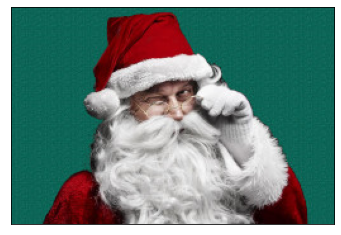

Santa Claus image:  (172, 256, 3)


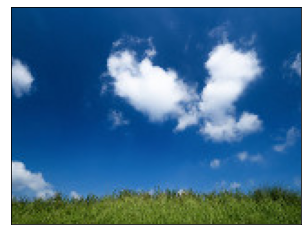

Landscape image:  (120, 160, 3)


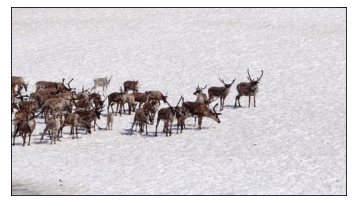

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


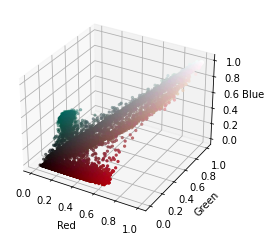

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def my_kmeans(points, k):
    max_iters=10
    centroids = np.random.rand(k,3) #random initialization of cluster centers
    clusters = np.array([])
    error = 0
    threshold = 1e-3
    
    #return a (k, #cluster_points, 3) ndarray and the total error
    def assign_center(centers, data):
        clusters = np.ndarray(shape=(0,3))
        index_list = [[] for _ in range(k)]
        error = 0.
        for i, point in enumerate(data):
            distances = np.linalg.norm(centers - point, axis=1)
            min_index = np.argmin(distances)
            index_list[min_index].append(i)
            clusters = np.append(clusters, [centers[min_index]], axis=0)
            error += distances[min_index]
        return (clusters, error, index_list)
    
    def compute_baricenter(data, index_list):
        centers = np.ndarray(shape=(0,3))
        for mask in index_list:
            centers = np.append(centers, [np.sum(data[mask], axis=0)/len(data[mask])], axis=0)
        return centers
    
    count = 0
    error_list = np.array([])
    while count < max_iters:
        clusters, error, index_list = assign_center(centroids, points)
        error_list = np.append(error_list, error)
        centroids = compute_baricenter(data, index_list)
        count += 1
        
    return centroids, clusters, error_list

## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

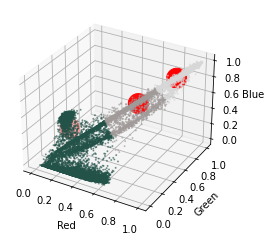

In [8]:
mykmeans_centers,clusters,error = my_kmeans(data, 3)


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

Text(0, 0.5, 'Error')

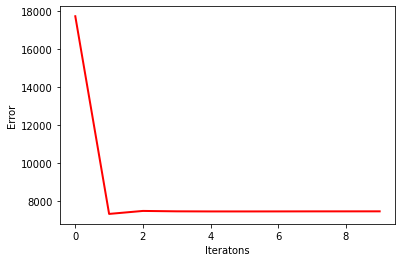

In [9]:
plt.plot(error, lw=2, c='r')
plt.xlabel('Iteratons')
plt.ylabel('Error')

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [10]:
kmeans =  KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)
kmeans_centers = kmeans.cluster_centers_
labels = kmeans.labels_
kmeans_clusters = np.array([kmeans_centers[i] for i in labels])

### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

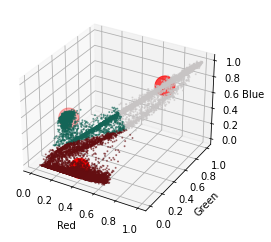

In [11]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=kmeans_clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(kmeans_centers[:,0], kmeans_centers[:,1], kmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

[ADD YOUR ANSWER HERE]

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

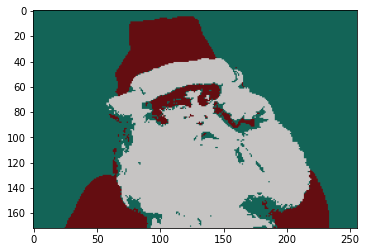

In [12]:
kmeans_image = kmeans_clusters.reshape(172, 256, 3)
plt.imshow(kmeans_image)

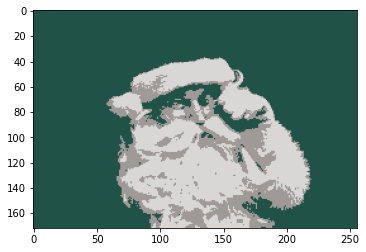

In [13]:
mykmeans_image = clusters.reshape(172, 256, 3)
plt.imshow(mykmeans_image)

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

[ADD YOUR ANSWER HERE]

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)


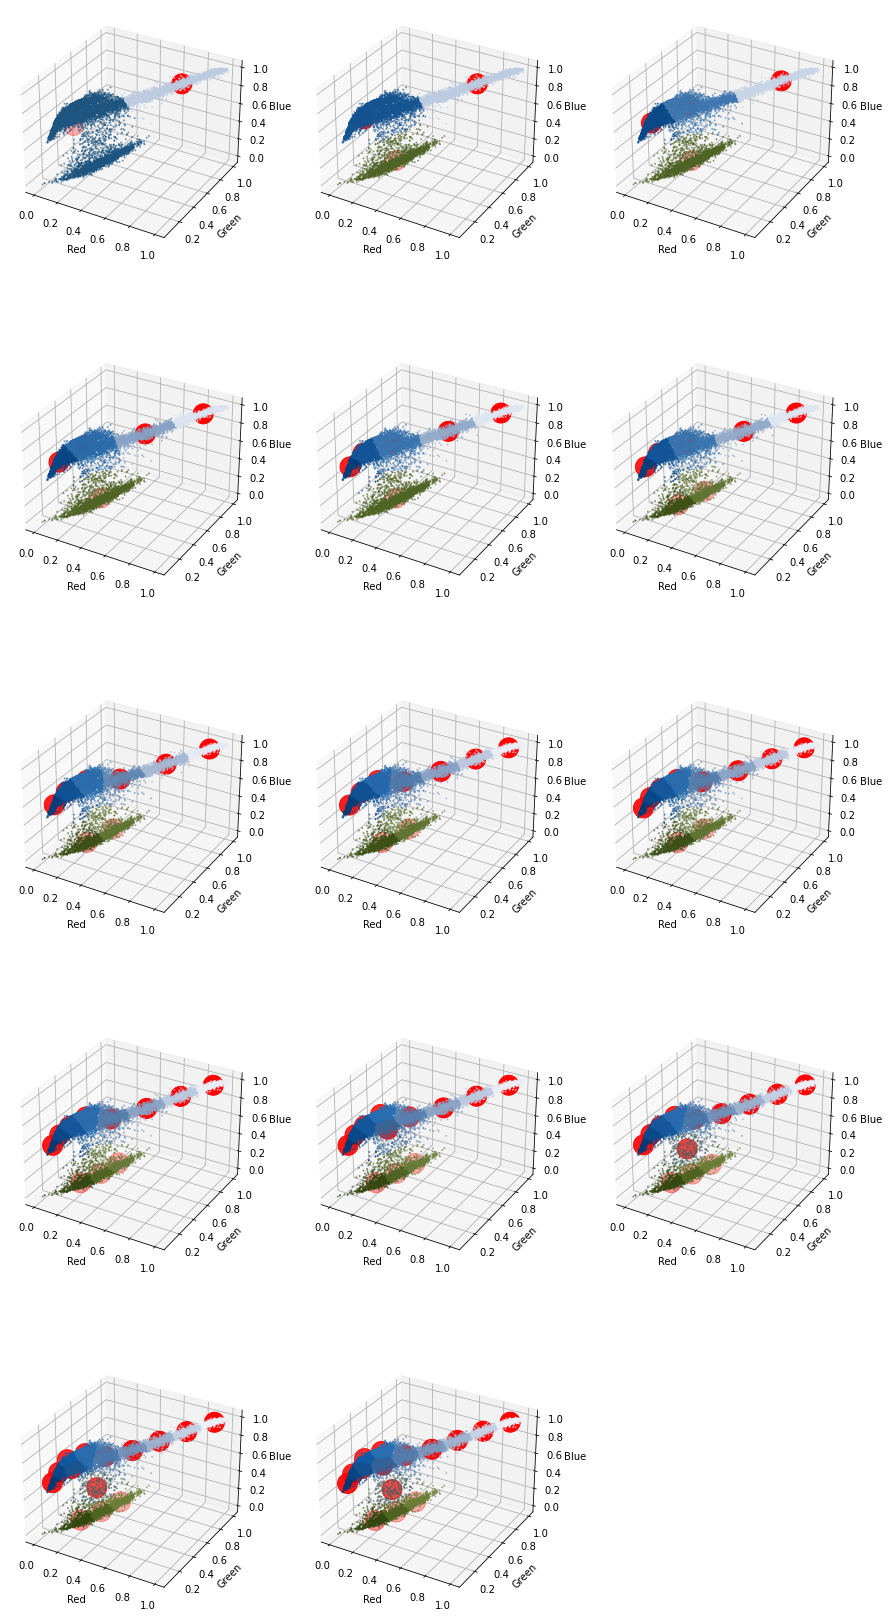

In [14]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
print(data.shape)
r, g, b = data[:,0], data[:,1], data[:,2]

kmeans = KMeans()
fig = plt.figure(figsize=(15,30))
errors = []
for k in range(2,16):
    kmeans.set_params(n_clusters=k)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    clusters = [centroids[i] for i in labels]
    errors.append(kmeans.inertia_)
    ax = fig.add_subplot(5, 3, k-1, projection='3d')
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c='red', s=400, zorder=10)

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

Text(0, 0.5, 'error')

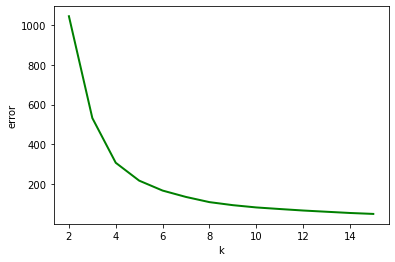

In [15]:
k_values = range(2,16)
plt.plot(k_values, errors, lw=2, c='g')
plt.xlabel('k')
plt.ylabel('error')

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

[ADD YOUR ANSWERS HERE]

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [16]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']
print(X.shape)

['X', 'labels_true']
(1500, 2)


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [27]:
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=2, linkage='single')
db.fit(X)
nclusters = db.n_clusters_
labels = db.labels_

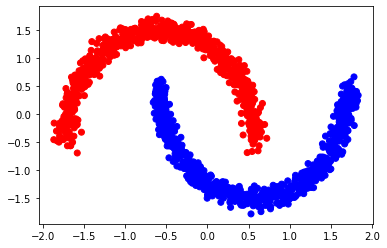

In [32]:
# Plot result
x, y = X[:, 0], X[:, 1]
colors = np.array(['r', 'b'])
plt.scatter(x, y, color=colors[labels])

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

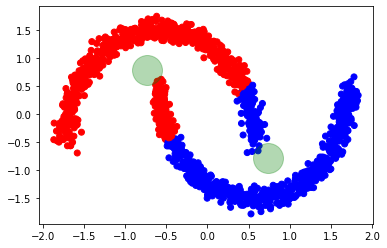

In [47]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
plt.plot(centers[:,0], centers[:,1], 'o', color='g', alpha=0.3, ms=30)
plt.scatter(x, y, c=colors[labels])


## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



[ADD YOUR ANSWER HERE]